In [2]:
import numpy as np
import pandas as pd
import ta
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from ta import add_all_ta_features
from ta import momentum
from ta.utils import dropna

In [3]:
def get_data(company_symbol):
    return pd.read_csv("dataset/"+company_symbol+".csv")

In [4]:
data = get_data("FB")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/18/2012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,5/21/2012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,5/22/2012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,5/23/2012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,5/24/2012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2374,10/25/2021,320.299988,329.559998,319.720001,328.690002,328.690002,38409000
2375,10/26/2021,328.260010,330.209991,309.600006,315.809998,315.809998,65654000
2376,10/27/2021,314.190002,319.250000,312.059998,312.220001,312.220001,29971800
2377,10/28/2021,312.989990,325.519989,308.109985,316.920013,316.920013,50806800


In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
data[data.columns[data.isna().any()]]

""
0
1
2
3
4
...
2374
2375
2376
2377


In [8]:
cond1 = data.Date.isna() # aapl['Date'].isna()
cond2 = data.Date.str.contains(r'^\s*$', na=False)
cond3 = data.Date == ''

data_checked = data.assign(cond1= cond1, cond2= cond2, cond3= cond3)
print (data_checked)

            Date        Open        High         Low       Close   Adj Close  \
0      5/18/2012   42.049999   45.000000   38.000000   38.230000   38.230000   
1      5/21/2012   36.529999   36.660000   33.000000   34.029999   34.029999   
2      5/22/2012   32.610001   33.590000   30.940001   31.000000   31.000000   
3      5/23/2012   31.370001   32.500000   31.360001   32.000000   32.000000   
4      5/24/2012   32.950001   33.209999   31.770000   33.029999   33.029999   
...          ...         ...         ...         ...         ...         ...   
2374  10/25/2021  320.299988  329.559998  319.720001  328.690002  328.690002   
2375  10/26/2021  328.260010  330.209991  309.600006  315.809998  315.809998   
2376  10/27/2021  314.190002  319.250000  312.059998  312.220001  312.220001   
2377  10/28/2021  312.989990  325.519989  308.109985  316.920013  316.920013   
2378  10/29/2021  320.190002  326.000000  319.600006  323.570007  323.570007   

         Volume  cond1  cond2  cond3  


In [9]:
def change(close):
    return (close.shift(-1) - close)

In [10]:
def direction(change):
    return (np.where(change>0, 1, 0))

In [11]:
def compute_all_indicators(data):
    data['Change'] = change(data['Close'])
    data['Direction'] = direction(data['Change'])
    return data

In [12]:
complete_data = compute_all_indicators(data)
complete_data

,Date,Open,High,Low,Close,Adj Close,Volume,Change,Direction
0,5/18/2012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,-4.200001,0
1,5/21/2012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-3.029999,0
2,5/22/2012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,1.000000,1
3,5/23/2012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,1.029999,1
4,5/24/2012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-1.119999,0
...,...,...,...,...,...,...,...,...,...
2374,10/25/2021,320.299988,329.559998,319.720001,328.690002,328.690002,38409000,-12.880004,0
2375,10/26/2021,328.260010,330.209991,309.600006,315.809998,315.809998,65654000,-3.589997,0
2376,10/27/2021,314.190002,319.250000,312.059998,312.220001,312.220001,29971800,4.700012,1
2377,10/28/2021,312.989990,325.519989,308.109985,316.920013,316.920013,50806800,6.649994,1


In [13]:
data_change_up = complete_data[complete_data['Direction'] == 1]

In [14]:
data_change_up["Change"].mean()

2.0165309208633104

In [15]:
data_change_up.count()

Date         1251
Open         1251
High         1251
Low          1251
Close        1251
Adj Close    1251
Volume       1251
Change       1251
Direction    1251
dtype: int64

In [16]:
data_change_up['Change'].sum()

2522.680182

In [17]:
data_change_down = complete_data[complete_data['Direction'] == 0]

In [18]:
data_change_down['Change'].mean()

-1.9852175465838475

In [19]:
data_change_down.count()

Date         1128
Open         1128
High         1128
Low          1128
Close        1128
Adj Close    1128
Volume       1128
Change       1127
Direction    1128
dtype: int64

In [95]:
data_change_down['Change'].sum()

-2237.3401750000003

Text(0, 0.5, 'Price')

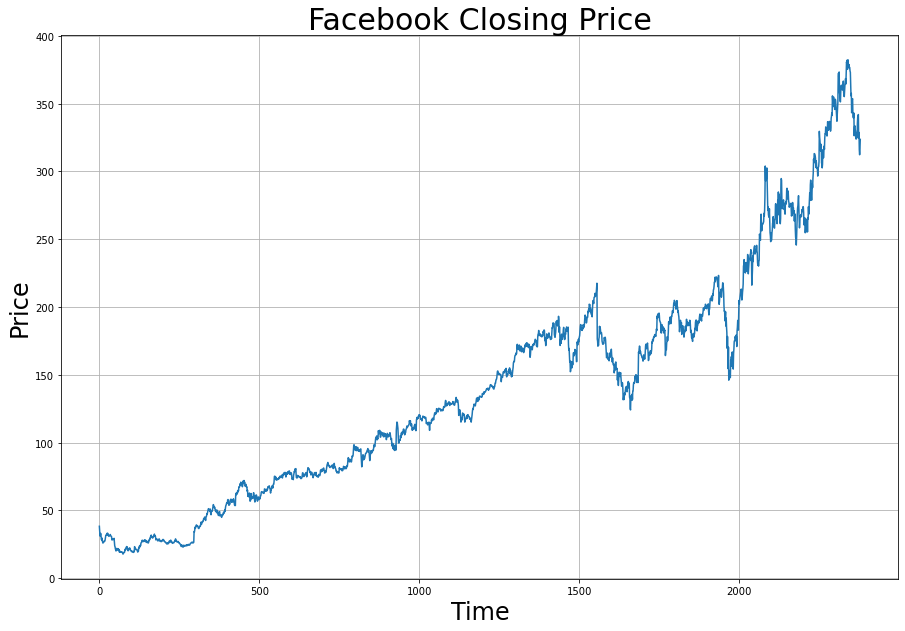

In [96]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(complete_data['Close'])
#plt.plot(dataMonthly['MA'],label='3-Month MA')
#plt.legend(loc=2, fontsize=18)
plt.title("Facebook Closing Price", fontsize=30)
plt.xlabel("Time", fontsize=24)
plt.ylabel("Price", fontsize=24)

In [97]:
data_5years = complete_data.iloc[2378-1250:2378, ]

In [98]:
buy_and_hold = (data_5years.iloc[1249,4] - data_5years.iloc[0,4]) / data_5years.iloc[0,4] * 100
buy_and_hold

162.3509976237335

In [99]:
data_up_5years = data_5years[data_5years['Direction'] == 1]
data_down_5years = data_5years[data_5years['Direction'] == 0]

In [100]:
max_up = data_up_5years['Change'].sum()
max_down = data_down_5years['Change'].sum()

In [101]:
avoid_tenth = (max_up+0.9*max_down)/data_5years.iloc[0,4]*100
avoid_tenth

310.7077901314289

In [102]:
theoretical_max = max_up / data_5years.iloc[0,4] * 100
theoretical_max

1596.3742666463343

In [47]:
target = complete_data['Direction']
complete_data = complete_data.drop(['Date', 'Direction'], axis=1)
complete_data

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA10,StochasticK,StochasticD,...,WMA10,EMA12,EMA26,MACD,Momentum,RSI,CCI,DI,ADX,Aroon
14,1.104286,1.122143,1.080000,1.082857,1.082857,2567600,1.120857,1.125643,7.110768,9.805238,...,1.125195,1.130077,1.149996,-0.019919,90.507418,0.282646,-87.262252,-4.041967,6.531289,-12.0
15,1.082143,1.085714,0.980000,0.986429,0.986429,4783800,1.094429,1.116643,2.549744,7.386740,...,1.099883,1.107977,1.137880,-0.029902,81.523058,0.282646,-217.891706,-11.332225,9.143382,-56.0
16,1.013571,1.059286,0.917857,0.922143,0.922143,4855200,1.047571,1.096000,1.363726,3.674746,...,1.064520,1.079387,1.121899,-0.042512,79.691361,0.282646,-222.155602,-15.840926,19.140010,-60.0
17,0.938571,0.939286,0.842143,0.910714,0.910714,10808000,0.999000,1.075286,17.582308,7.165259,...,1.030831,1.053438,1.106256,-0.052818,82.524278,0.381194,-218.434212,-15.825737,27.026513,-64.0
18,0.911429,0.996429,0.892857,0.951429,0.951429,5482400,0.970714,1.055714,28.022051,15.656028,...,1.008312,1.037744,1.094787,-0.057043,88.800004,0.381194,-124.845930,-11.360356,33.442196,-64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,651.809998,665.460022,651.809998,664.780029,664.780029,6179700,644.009998,636.387994,98.839008,85.267842,...,641.291452,636.218990,619.660215,16.558775,110.181496,0.910010,289.554743,4.545124,30.296476,92.0
4890,663.739990,675.880005,657.070007,671.659973,671.659973,3833500,650.747998,640.849994,92.814518,96.740267,...,647.704539,641.671449,623.512049,18.159400,105.804883,0.675676,233.314986,5.191655,30.298693,96.0
4891,673.760010,676.489990,662.770020,668.520020,668.520020,2904800,656.652002,645.207996,86.568968,92.740831,...,652.735453,645.801998,626.845973,18.956025,104.603356,0.675676,164.113158,4.356440,30.769399,76.0
4892,669.000000,671.409973,661.849976,662.919983,662.919983,2276900,664.207996,648.523993,77.131758,85.505081,...,655.955814,648.435534,629.518122,18.917412,104.917308,0.675676,110.708606,3.125012,31.225713,76.0
